### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR


In [4]:
df = pd.read_csv("../data/USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1     188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2     9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                           USS Barnett\r\nFPO AP 44820  
4                          USNS Raymond\r\nFPO AE 09386  
...                                                 ...  
4995                 USNS Williams\r\nFPO AP 30153-7653  
4996            PSC 9258, Box 8489\r\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\r\nJoshualand, VA ...  
4998                        USS Wallace\r\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\r\nEast Holly, NV...  

[5000 rows x 7 columns]

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

## 1. Regresión no lineal utilizando SVR

### Avg. Area Income

In [19]:
# selecciono las dos columnas con las que voy a trabjar y genero oun nuevo dataframe con estas dos columnas
df_Income = df.loc[:,['Avg. Area Income','Price']]

In [20]:
X = df_Income['Avg. Area Income'].values.reshape(-1,1)
y =df_Income['Price'].values.reshape(-1,1)

In [21]:
# Test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
model.score: 0.0005076876280832865


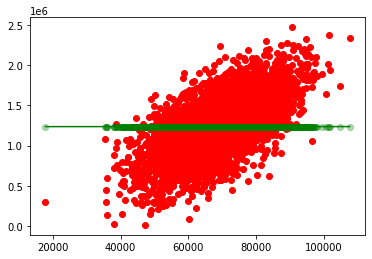

In [22]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_train, y_prediction)))
plt.scatter(X_train_to_show, y_prediction, color='green', alpha=0.3)
plt.plot(X_train_to_show, y_prediction, color='green')

### Avg. Area House Age

In [23]:
# selecciono las dos columnas con las que voy a trabjar y genero oun nuevo dataframe con estas dos columnas
df_Age = df.loc[:,['Avg. Area House Age','Price']]

In [24]:
X = df_Age['Avg. Area House Age'].values.reshape(-1,1)
y =df_Age['Price'].values.reshape(-1,1)

In [25]:
# Test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
model.score: 0.03795339653329999


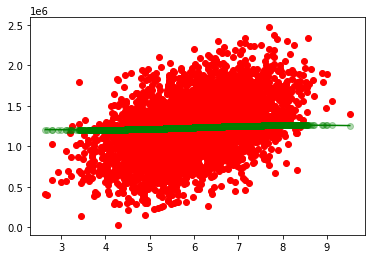

In [26]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_train, y_prediction)))
plt.scatter(X_train_to_show, y_prediction, color='green', alpha=0.3)
plt.plot(X_train_to_show, y_prediction, color='green')

### Avg. Area Number of Rooms

In [27]:
# selecciono las dos columnas con las que voy a trabjar y genero oun nuevo dataframe con estas dos columnas
df_Rooms = df.loc[:,['Avg. Area Number of Rooms','Price']]

In [28]:
X = df_Rooms['Avg. Area Number of Rooms'].values.reshape(-1,1)
y =df_Rooms['Price'].values.reshape(-1,1)

In [29]:
# Test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
model.score: 0.021521894923902996


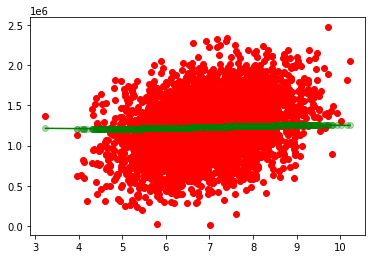

In [30]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_train, y_prediction)))
plt.scatter(X_train_to_show, y_prediction, color='green', alpha=0.3)
plt.plot(X_train_to_show, y_prediction, color='green')

### Avg. Area Number of Bedrooms

In [31]:
df_Bedrooms = df.loc[:,['Avg. Area Number of Bedrooms','Price']]


In [32]:
X = df_Bedrooms['Avg. Area Number of Bedrooms'].values.reshape(-1,1)
y =df_Bedrooms['Price'].values.reshape(-1,1)

In [33]:
# Test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
model.score: 0.00783162745317778


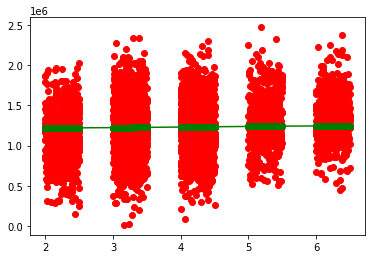

In [34]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_train, y_prediction)))
plt.scatter(X_train_to_show, y_prediction, color='green', alpha=0.3)
plt.plot(X_train_to_show, y_prediction, color='green')

### Area Population

In [35]:
df_Population = df.loc[:,['Area Population','Price']]

In [36]:
X = df_Population['Area Population'].values.reshape(-1,1)
y =df_Population['Price'].values.reshape(-1,1)

In [37]:
# Test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
model.score: 0.0004238113399747112


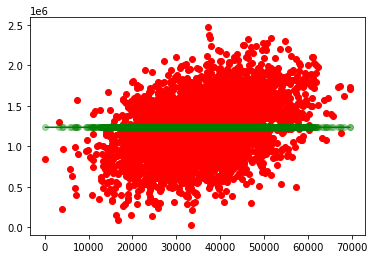

In [38]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_train, y_prediction)))
plt.scatter(X_train_to_show, y_prediction, color='green', alpha=0.3)
plt.plot(X_train_to_show, y_prediction, color='green')

## 2. Clasificación

In [71]:
import numpy as np
import matplotlib.pyplot as plt


def plot_data(X, y):
    """
    Plots the data points X and y into a new figure.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Target values (class labels in classification).
    """
    pos = np.nonzero(y == 1)
    neg = np.nonzero(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')


In [72]:
def visualize_boundary_linear(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : Support Vector Classification
        The trained SVM.
    """
    plot_data(X, y)

    coef = clf.coef_.ravel()
    intercept = clf.intercept_.ravel()

    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]

    plt.plot(xp, yp, linestyle='-', color='b')


In [73]:
def visualize_boundary(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : sklearn.svm.classes.SVC
        The trained SVM.
    """
    plot_data(X, y)
    x1_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2_plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        X_tmp = np.hstack((X1[:, i:i + 1], X2[:, i:i + 1]))
        vals[:, i] = clf.predict(X_tmp)
    plt.contour(X1, X2, vals, levels=[0])


In [81]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].round() 


### Income

In [82]:
X = df['Avg. Area Income'].values.reshape (-1,1)
y = df['Avg. Area Number of Bedrooms'].values.reshape(-1,1)

In [83]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn import svm

C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X_train, y_train)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X_train, y_train, clf)
plt.xlim([17000, 110000])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()



C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
score: 0.2964
C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

### Avg. Area House Age

In [ ]:
X = df['Avg. Area House Age'].values.reshape(-1,1)
y = df['Avg. Area Number of Bedrooms'].values.reshape(-1,1)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import svm

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([2, 10])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

### Avg. Area Number of Rooms

In [ ]:
X = df['Avg. Area Number of Rooms'].values.reshape(-1,1)
y = df['Avg. Area Number of Bedrooms'].values.reshape(-1,1)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import svm

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([3, 11])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

### Area Population

In [ ]:
X = df['Area Population'].values.reshape(-1,1)
y = df['Avg. Area Number of Bedrooms'].values.reshape(-1,1)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import svm

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([170, 70000])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

### Price

In [ ]:
X = df['Price'].values.reshape(-1,1)
y = df['Avg. Area Number of Bedrooms'].values.reshape(-1,1)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import svm

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([15000, 2000000])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

### 4

In [70]:
# Establecemos que columnas son variables independientes y cual dependiente
X = np.array(df.drop(['Avg. Area Number of Bedrooms'], axis=1))
y = np.array(df['Avg. Area Number of Bedrooms'])
print(y.shape)
X.shape

(5000,)


(5000, 6)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import svm

# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 100
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([15000, 2000000])
plt.ylim([2.0, 6.0])  
plt.title("Dataset 1")
plt.show()

In [ ]:
predicciones = clf.predict(X_test) 

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")